<a href="https://colab.research.google.com/github/Abdul-Lahad/PyTorch-Tutorial/blob/main/FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x 28
hidden_size = 100
num_classes = 10
num_epochs = 2
learning_rate = 0.001
batch_size = 100

#MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
batch = next(examples)
samples, labels = batch
print(samples.shape, labels.shape)

cuda


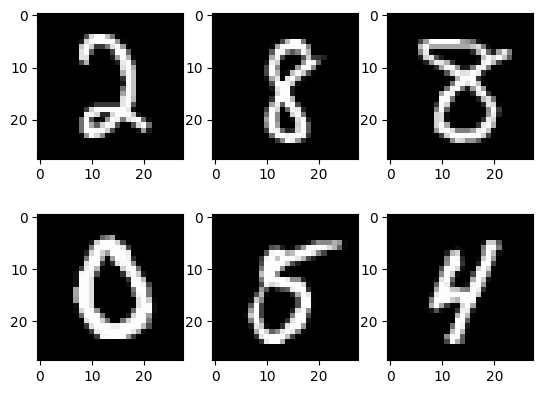

In [26]:
#Ploting the Image
for i in range(6):
    plt.subplot(2,3,i+1) # 2: Number of rows in the grid.
                         # 3: Number of columns in the grid.
                         # i + 1: The position of the subplot within the grid (1-indexed).
    plt.imshow(samples[i][0],cmap='gray')

plt.show()

In [27]:
#Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)
model.to(device)

NeuralNet(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

In [28]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
#training loop
n_total_steps = len(train_loader)
print("training start")
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28,28
        # 100,784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        #forward
        outputs = model(images)

        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
          print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

print("training done")

training start
epoch 1/2, step 100/600, loss = 0.0419
epoch 1/2, step 200/600, loss = 0.1297
epoch 1/2, step 300/600, loss = 0.0769
epoch 1/2, step 400/600, loss = 0.0309
epoch 1/2, step 500/600, loss = 0.0553
epoch 1/2, step 600/600, loss = 0.0689
epoch 2/2, step 100/600, loss = 0.0473
epoch 2/2, step 200/600, loss = 0.1377
epoch 2/2, step 300/600, loss = 0.0865
epoch 2/2, step 400/600, loss = 0.0783
epoch 2/2, step 500/600, loss = 0.0649
epoch 2/2, step 600/600, loss = 0.0268
training done


In [34]:
#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    #value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0] # labels row is 1
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

accuracy = 97.45


tensor([[ 0.0312, -4.6893, -1.3456, -3.2608, -4.4847,  1.0186,  7.8893, -7.2726,
         -4.5799, -8.8736]], device='cuda:0', grad_fn=<AddmmBackward0>)
Predidted number :  6


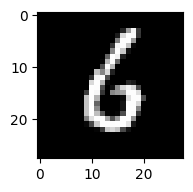

In [52]:
# Test with the single example

test_examples = iter(test_loader)
test_batch = next(examples)
test_samples, test_labels = batch

test1_sample = test_samples[50].reshape(-1,28*28).to(device)
test1_label = test_labels[50].to(device)
test1_output = model(test1_sample)
print(test1_output)

_, test1_prediction = torch.max(test1_output, 1)
print("Predidted number : ", test1_prediction.item())

#Ploting the Image
plt.subplot(2,3,1)
plt.imshow(test_samples[50][0],cmap='gray')
plt.show()
